# Problem Statement
**The project deals with the sentimental analysis of the products reviews that help the merchants to deliver and refer the best quality goods to the customer.**

There may be two points we can divide it:
- Which product categories have lower reviews/ maybe inferior products?
- Which product has higher customer reviews/ maybe superior products?

Solution:<br>
Keep the products with higher ratings and better reviews, associated with the positive/ negative words for each product review. And by sentiment analysis, we can predict a review score for each such product.

Here, we have the dataset based on Amazon branded/ manufactured product only.

Sample rated review:<br>
Product X is highly rated, seems most people like its lightweight, premium and portable design. While negative rated products have words saying they are too heavy or couldn't fit in the bags.
So, here we suggest procuct manufacturer to make more portable and lightweight models (based on the analysis).

# Raw Data

In [1]:
#importing necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import math
import warnings
import seaborn as sn
warnings.filterwarnings('ignore') #ignores warnings
sn.set_style("whitegrid") #plotting style
#shows plots wihin the notebook
%matplotlib inline 
np.random.seed(5) #random number generator seed

filename="1429_1.csv"
prod_rev=pd.read_csv(filename)
prod_rev.head(3)

,id,name,asins,brand,categories,keys,manufacturer,reviews.date,reviews.dateAdded,reviews.dateSeen,...,reviews.doRecommend,reviews.id,reviews.numHelpful,reviews.rating,reviews.sourceURLs,reviews.text,reviews.title,reviews.userCity,reviews.userProvince,reviews.username
0,AVqkIhwDv8e3D1O-lebb,"All-New Fire HD 8 Tablet, 8 HD Display, Wi-Fi,...",B01AHB9CN2,Amazon,"Electronics,iPad & Tablets,All Tablets,Fire Ta...","841667104676,amazon/53004484,amazon/b01ahb9cn2...",Amazon,2017-01-13T00:00:00.000Z,2017-07-03T23:33:15Z,"2017-06-07T09:04:00.000Z,2017-04-30T00:45:00.000Z",...,True,NaN,0.0,5.0,http://reviews.bestbuy.com/3545/5620406/review...,This product so far has not disappointed. My c...,Kindle,NaN,NaN,Adapter
1,AVqkIhwDv8e3D1O-lebb,"All-New Fire HD 8 Tablet, 8 HD Display, Wi-Fi,...",B01AHB9CN2,Amazon,"Electronics,iPad & Tablets,All Tablets,Fire Ta...","841667104676,amazon/53004484,amazon/b01ahb9cn2...",Amazon,2017-01-13T00:00:00.000Z,2017-07-03T23:33:15Z,"2017-06-07T09:04:00.000Z,2017-04-30T00:45:00.000Z",...,True,NaN,0.0,5.0,http://reviews.bestbuy.com/3545/5620406/review...,great for beginner or experienced person. Boug...,very fast,NaN,NaN,truman
2,AVqkIhwDv8e3D1O-lebb,"All-New Fire HD 8 Tablet, 8 HD Display, Wi-Fi,...",B01AHB9CN2,Amazon,"Electronics,iPad & Tablets,All Tablets,Fire Ta...","841667104676,amazon/53004484,amazon/b01ahb9cn2...",Amazon,2017-01-13T00:00:00.000Z,2017-07-03T23:33:15Z,"2017-06-07T09:04:00.000Z,2017-04-30T00:45:00.000Z",...,True,NaN,0.0,5.0,http://reviews.bestbuy.com/3545/5620406/review...,Inexpensive tablet for him to use and learn on...,Beginner tablet for our 9 year old son.,NaN,NaN,DaveZ


- We can refine out sentiment analysis result using the reviews.text column, alongside the reviews.rating and reviews.doRecommend column
- We can add a new column - **"SENTIMENT"** that labels reach review into categories- Positive, Neutral and Negative

In [2]:
temp_data=prod_rev
temp_data.describe()

,reviews.id,reviews.numHelpful,reviews.rating,reviews.userCity,reviews.userProvince
count,1.0,34131.000000,34627.000000,0.0,0.0
mean,111372787.0,0.630248,4.584573,NaN,NaN
std,NaN,13.215775,0.735653,NaN,NaN
min,111372787.0,0.000000,1.000000,NaN,NaN
25%,111372787.0,0.000000,4.000000,NaN,NaN
50%,111372787.0,0.000000,5.000000,NaN,NaN
75%,111372787.0,0.000000,5.000000,NaN,NaN
max,111372787.0,814.000000,5.000000,NaN,NaN


Based on the above descriptive stats, we observe:
- Average rating score was *4.58* (quite high), with low standard deviation
- Data from 2nd quatile onwardds has high review ratings
- The *"reviews.userCity"* and *"reviews.userProvince"* are completely empty.
- For the *"reviews.numHelpful"* column:
- The average is *0.63* (quite low) with high standard deviation of *~13*
- The most helpful review was for 814 people, from which we can infer this might be a detailed and rich review

In [3]:
temp_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34660 entries, 0 to 34659
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    34660 non-null  object 
 1   name                  27900 non-null  object 
 2   asins                 34658 non-null  object 
 3   brand                 34660 non-null  object 
 4   categories            34660 non-null  object 
 5   keys                  34660 non-null  object 
 6   manufacturer          34660 non-null  object 
 7   reviews.date          34621 non-null  object 
 8   reviews.dateAdded     24039 non-null  object 
 9   reviews.dateSeen      34660 non-null  object 
 10  reviews.didPurchase   1 non-null      object 
 11  reviews.doRecommend   34066 non-null  object 
 12  reviews.id            1 non-null      float64
 13  reviews.numHelpful    34131 non-null  float64
 14  reviews.rating        34627 non-null  float64
 15  reviews.sourceURLs 

Based on the information:
- Drop *reviews.userCity*, *reviews.userProvince* because their count is zero,i.e., there are all null values
- Drop *reviews.id* and *reviews.didPurchase* because we are not concerned for individuals but for the product as a whole
- Positive side of the data is that the *reviews.text* column has the least amount of missing values which is worthy for our analysis
- The *name* column has ~7000 missing values which we can clean up using reference to their *asins* which is short of just 2 values.

In [4]:
temp_data["asins"].unique()

array(['B01AHB9CN2', 'B00VINDBJK', 'B005PB2T0S', 'B002Y27P3M',
       'B01AHB9CYG', 'B01AHB9C1E', 'B01J2G4VBG', 'B00ZV9PXP2',
       'B0083Q04TA', 'B018Y229OU', 'B00REQKWGA', 'B00IOYAM4I',
       'B018T075DC', nan, 'B00DU15MU4', 'B018Y225IA', 'B005PB2T2Q',
       'B018Y23MNM', 'B00OQVZDJM', 'B00IOY8XWQ', 'B00LO29KXQ',
       'B00QJDU3KY', 'B018Y22C2Y', 'B01BFIBRIE', 'B01J4ORNHU',
       'B018SZT3BK', 'B00UH4D8G2', 'B018Y22BI4', 'B00TSUGXKE',
       'B00L9EPT8O,B01E6AO69U', 'B018Y23P7K', 'B00X4WHP5E', 'B00QFQRELG',
       'B00LW9XOJM', 'B00QL1ZN3G', 'B0189XYY0Q', 'B01BH83OOM',
       'B00BFJAHF8', 'B00U3FPN4U', 'B002Y27P6Y', 'B006GWO5NE',
       'B006GWO5WK'], dtype=object)

In [5]:
unique_asins=len(temp_data["asins"].unique())
print("No of unique ASINS: ",unique_asins)

No of unique ASINS:  42


**Visualising the distribution for worthy numerical variables**

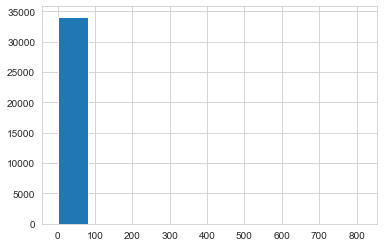

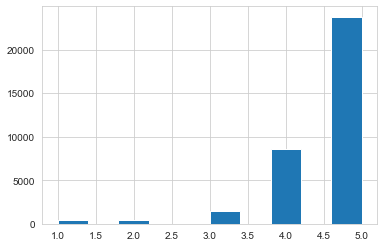

In [6]:
temp_data["reviews.numHelpful"].hist()
plt.show()
temp_data["reviews.rating"].hist()
plt.show()

Based on the graphical observations:
- reviews.numHelpful: Similar to previous observations, most of the reviews arent that much helpful. But here the outliers are valuable to us, so we can weight those reviews more which have 50+ people found helpful
- reviews.rating: Most of the products are rated 5 star (almost twice the amount of other rated products combined)

# Splitting data into Train/ Test
- Before we explore the data further we split the dataset into train and test sets
- As mentioned earlier, most of the reviews are 5 starred, so in order to train the classifier well, we will need to stratify the data split based on the *reviews.rating* 
- We use sklearn's **StratifiedShiffleSplit** class. Before the we remove NaN values from the *reviews.rating* column and convert its datatype to *integer*

In [7]:
from sklearn.model_selection import StratifiedShuffleSplit
print("Before cleaning: {}".format(len(temp_data)))
dataAfter=temp_data.dropna(subset=["reviews.rating"]) #removes all NAN values in ratings column
print("After cleaning: {}".format(len(dataAfter)))
dataAfter["reviews.rating"]=dataAfter["reviews.rating"].astype(int)

Before cleaning: 34660
After cleaning: 34627


In [8]:
split=StratifiedShuffleSplit(n_splits=5, test_size=0.2)
for train_index, test_index in split.split(dataAfter, dataAfter["reviews.rating"]):
    strat_train= dataAfter.reindex(train_index)
    strat_test= dataAfter.reindex(test_index)

**Check to see if the train/ test sets were stratified propotionately**

In [9]:
len(strat_train),len(strat_test)

(27701, 6926)

In [10]:
strat_train["reviews.rating"].value_counts()/len(strat_train)

5.0    0.684560
4.0    0.247861
3.0    0.043248
1.0    0.011769
2.0    0.011480
Name: reviews.rating, dtype: float64

In [11]:
strat_test["reviews.rating"].value_counts()/len(strat_test)

5.0    0.692319
4.0    0.241409
3.0    0.043171
2.0    0.011984
1.0    0.010684
Name: reviews.rating, dtype: float64

# Data Exploration (for Training set)

In [12]:
review_data=strat_train.copy()
review_data.head(3)

,id,name,asins,brand,categories,keys,manufacturer,reviews.date,reviews.dateAdded,reviews.dateSeen,...,reviews.doRecommend,reviews.id,reviews.numHelpful,reviews.rating,reviews.sourceURLs,reviews.text,reviews.title,reviews.userCity,reviews.userProvince,reviews.username
22118,AVpfl8cLLJeJML43AE3S,"Echo (White),,,\r\nEcho (White),,,","B00L9EPT8O,B01E6AO69U",Amazon,"Stereos,Remote Controls,Amazon Echo,Audio Dock...","echowhite/263039693056,echowhite/152558276095,...",Amazon,2017-05-19T00:00:00.000Z,NaN,"2017-09-28T00:00:00Z,2017-09-08T00:00:00Z,2017...",...,True,NaN,0.0,4.0,http://reviews.bestbuy.com/3545/5588528/review...,Not sure about having a bot monitor my househo...,Handy info.,NaN,NaN,Alex
18251,AV1YnRtnglJLPUi8IJmV,Amazon Kindle Paperwhite - eBook reader - 4 GB...,B00OQVZDJM,Amazon,"Walmart for Business,Office Electronics,Tablet...","amazon/b00oqvzdjm,848719056099,amazonkindlepap...",Amazon,2016-01-15T00:00:00.000Z,2017-09-05T22:09:30Z,"2017-08-31T22:33:54.374Z,2017-08-02T19:49:33.4...",...,True,NaN,0.0,4.0,http://reviews.bestbuy.com/3545/9439005/review...,I take this with me when I don't want to carry...,Great for traveling.,NaN,NaN,lilcarol
4471,AVphgVaX1cnluZ0-DR74,"Fire Tablet, 7 Display, Wi-Fi, 8 GB - Includes...",B018Y229OU,Amazon,"Fire Tablets,Tablets,Computers & Tablets,All T...",firetablet7displaywifi8gbincludesspecialoffers...,Amazon,2017-01-17T00:00:00.000Z,2017-05-21T03:55:11Z,"2017-04-30T00:25:00.000Z,2017-06-07T08:12:00.000Z",...,True,NaN,0.0,5.0,http://reviews.bestbuy.com/3545/5025800/review...,easy to use. looks good. The prize winner was ...,Used one like it for a raffle prize,NaN,NaN,mujeralegre


We explore the following columns:
- asins
- name
- reviews.rating
- reviews.doRecommend
- (review.numHelpful - not possible because variation is high and majority being in the range 0-13)
- (reviews.text - way too long to explore properly)

## names and ASINS

In [13]:
len(review_data["name"].unique()), len(review_data["asins"].unique())

(47, 36)

In [14]:
review_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 27701 entries, 22118 to 10337
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    27671 non-null  object 
 1   name                  22209 non-null  object 
 2   asins                 27669 non-null  object 
 3   brand                 27671 non-null  object 
 4   categories            27671 non-null  object 
 5   keys                  27671 non-null  object 
 6   manufacturer          27671 non-null  object 
 7   reviews.date          27652 non-null  object 
 8   reviews.dateAdded     19259 non-null  object 
 9   reviews.dateSeen      27671 non-null  object 
 10  reviews.didPurchase   1 non-null      object 
 11  reviews.doRecommend   27243 non-null  object 
 12  reviews.id            1 non-null      float64
 13  reviews.numHelpful    27294 non-null  float64
 14  reviews.rating        27671 non-null  float64
 15  reviews.sourceU

There are only 36 uniques ASINS
- for easch ASINS, there are multiple names
- there are cases where vendors might have entered different name for same ASINS
- there could be some NaN names associated with ASINS, alongwith names with slight variations

In [15]:
review_data.groupby("asins")["name"].unique()

asins
B005PB2T0S               [Amazon Kindle Lighted Leather Cover,,,\r\nAma...
B005PB2T2Q               [Fire Kids Edition Tablet, 7 Display, Wi-Fi, 1...
B00DU15MU4               [Brand New Amazon Kindle Fire 16gb 7 Ips Displ...
B00IOY8XWQ               [Kindle Voyage E-reader, 6 High-Resolution Dis...
B00IOYAM4I               [Brand New Amazon Kindle Fire 16gb 7 Ips Displ...
B00L9EPT8O,B01E6AO69U    [Echo (White),,,\r\nEcho (White),,,, Amazon Fi...
B00LO29KXQ               [Fire Tablet, 7 Display, Wi-Fi, 8 GB - Include...
B00LW9XOJM                                                           [nan]
B00OQVZDJM               [Amazon Kindle Paperwhite - eBook reader - 4 G...
B00QFQRELG                                                           [nan]
B00QJDU3KY               [Fire Tablet, 7 Display, Wi-Fi, 8 GB - Include...
B00QL1ZN3G                                                           [nan]
B00REQKWGA               [Brand New Amazon Kindle Fire 16gb 7 Ips Displ...
B00TSUGXKE         

Here, we can see there is one product having 2 different ASINS.<br>
Therefore, checking for those 2 ASINS

In [16]:
different_names = review_data[review_data["asins"] == "B00L9EPT8O,B01E6AO69U"]["name"].unique()
for name in different_names:
    print(name)

Echo (White),,,
Echo (White),,,
Amazon Fire Tv,,,
Amazon Fire Tv,,,
nan
Amazon - Amazon Tap Portable Bluetooth and Wi-Fi Speaker - Black,,,
Amazon - Amazon Tap Portable Bluetooth and Wi-Fi Speaker - Black,,,
Amazon Fire Hd 10 Tablet, Wi-Fi, 16 Gb, Special Offers - Silver Aluminum,,,
Amazon Fire Hd 10 Tablet, Wi-Fi, 16 Gb, Special Offers - Silver Aluminum,,,
Amazon 9W PowerFast Official OEM USB Charger and Power Adapter for Fire Tablets and Kindle eReaders,,,
Amazon 9W PowerFast Official OEM USB Charger and Power Adapter for Fire Tablets and Kindle eReaders,,,
Kindle Dx Leather Cover, Black (fits 9.7 Display, Latest and 2nd Generation Kindle Dxs),,
Amazon Fire Hd 6 Standing Protective Case(4th Generation - 2014 Release), Cayenne Red,,,
Amazon Fire Hd 6 Standing Protective Case(4th Generation - 2014 Release), Cayenne Red,,,
Amazon Fire Hd 6 Standing Protective Case(4th Generation - 2014 Release), Cayenne Red,,,
Amazon 5W USB Official OEM Charger and Power Adapter for Fire Tablets and Kin

In [17]:
review_data[review_data["asins"] == "B00L9EPT8O,B01E6AO69U"]["name"].value_counts()

Echo (White),,,\r\nEcho (White),,,                                                                                                                                                                                  2275
Amazon Fire Tv,,,\r\nAmazon Fire Tv,,,                                                                                                                                                                              2023
Amazon - Amazon Tap Portable Bluetooth and Wi-Fi Speaker - Black,,,\r\nAmazon - Amazon Tap Portable Bluetooth and Wi-Fi Speaker - Black,,,                                                                           253
Amazon Fire Hd 10 Tablet, Wi-Fi, 16 Gb, Special Offers - Silver Aluminum,,,\r\nAmazon Fire Hd 10 Tablet, Wi-Fi, 16 Gb, Special Offers - Silver Aluminum,,,                                                           101
Amazon 9W PowerFast Official OEM USB Charger and Power Adapter for Fire Tablets and Kindle eReaders,,,\r\nAmazon 9W PowerFast Offici

We have confirmed that for a single ASIN we can have multiple names.<br>
**Therfore we will concerm ourselves with ASINS, not the product names**

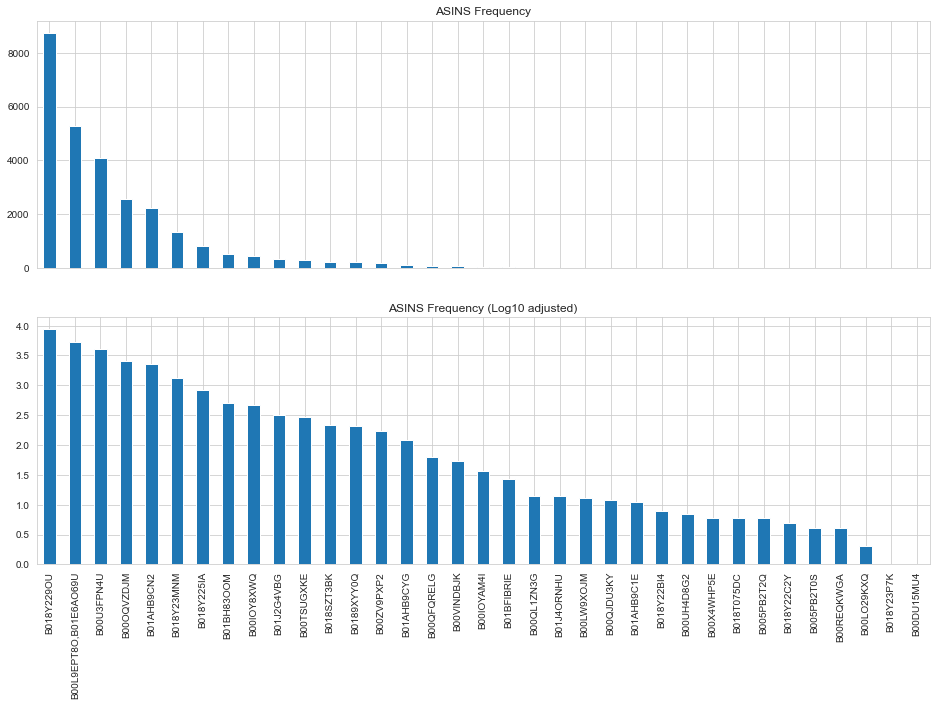

In [18]:
fig=plt.figure(figsize=(16,10))
ax1=plt.subplot(211)
ax2=plt.subplot(212, sharex=ax1)
review_data["asins"].value_counts().plot(kind="bar", ax=ax1, title="ASINS Frequency")
np.log10(review_data["asins"].value_counts()).plot(kind="bar", ax=ax2, title="ASINS Frequency (Log10 adjusted)")
plt.show()

- Based on the bar graph for ASINS, we can see certain products have higher review counts indicating higher sales in those specific products
- It is a "right- tailed" distribution which also suggest that certain products with higher sales which can correlate to higher ASINs frequencies in the reviews

**This answers one of our questions that certain ASINs have higher sales, some have lower which in turn dictates that the products be kept or dropped.**

In [19]:
review_data["reviews.rating"].mean()

4.583679664630841

## reviews.rating and ASINS

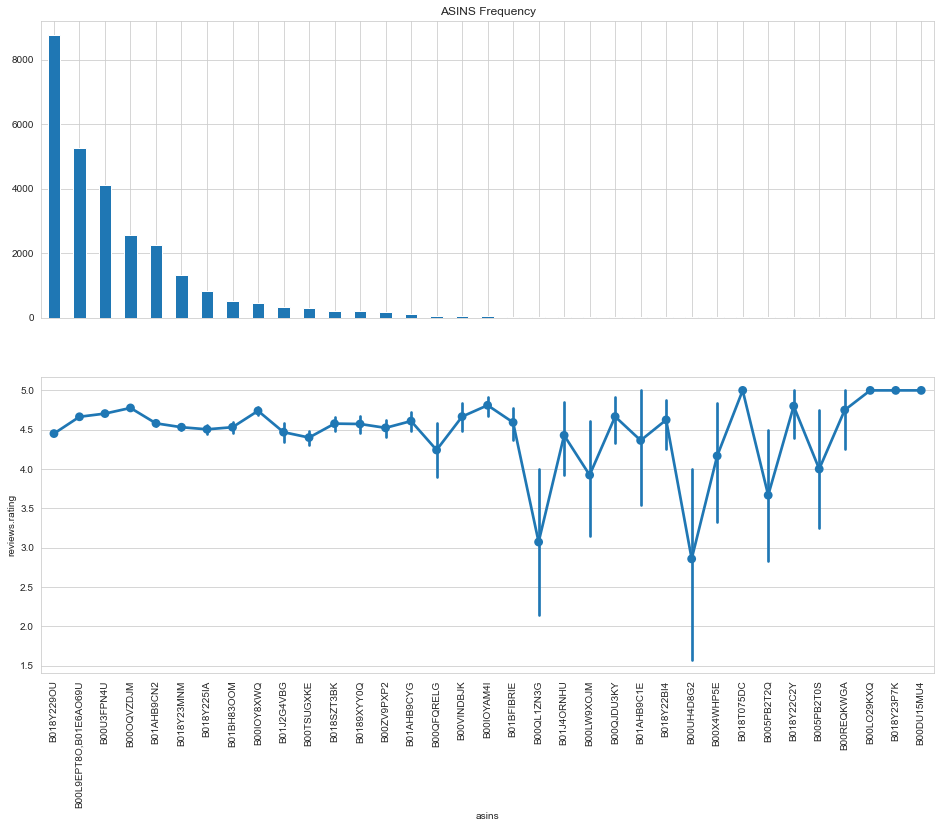

In [20]:
asins_count_index= review_data["asins"].value_counts().index
fig=plt.figure(figsize=(16,12))
ax1=plt.subplot(211)
ax2=plt.subplot(212, sharex=ax1)
review_data["asins"].value_counts().plot(kind="bar",ax=ax1, title="ASINS Frequency")
ax2=sn.pointplot(x="asins", y="reviews.rating", order= asins_count_index, data=review_data)
plt.xticks(rotation=90)
plt.show()

- 1. The most frequently brought products have average review ratings in the range 4.5- 4.8, with little variance
- 2. For ASINS with lower frequency, we can see their corresponding average review ratings has significantly higher variance as shown by the length of the vertical lines. As a result, the average ratings for ASINS with lower frequencies are not significant for our analysis due higher variance.
- 3. Also for products with lower frequencies ASINS having lower ratings, we suggest that this is a result of lower quality products.
- 4. Last 3 ASINS with low frequecies, have no variance and 5 star mean rating because of very few ratings available which should not be considered.

## reviews.doRecommend and ASINS

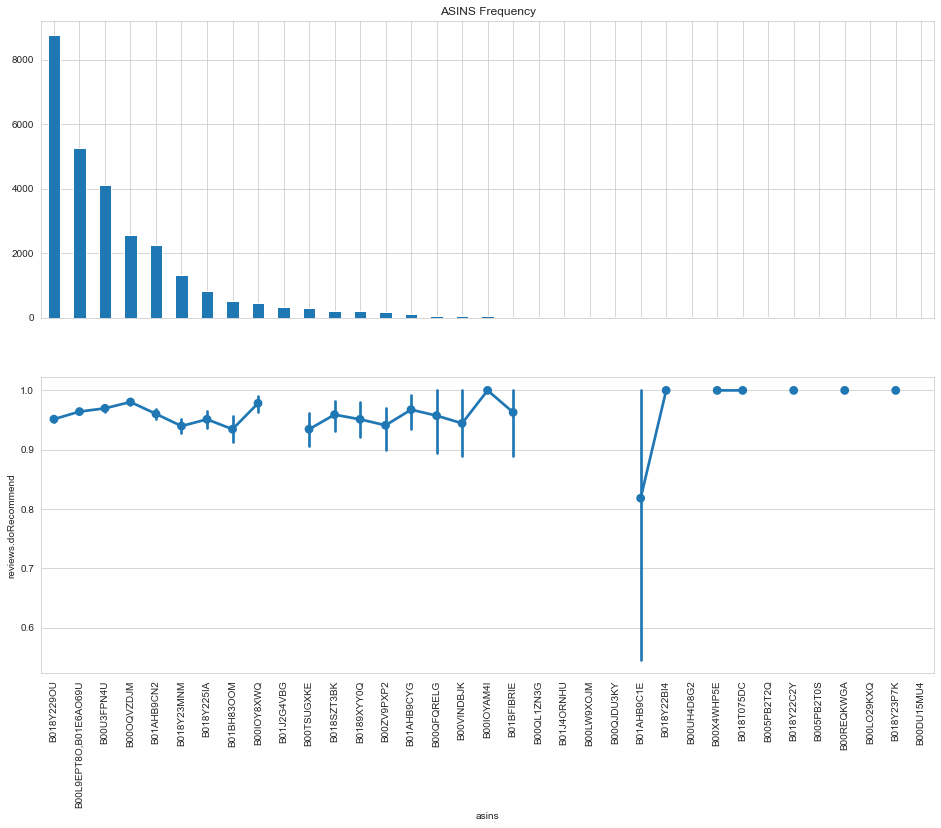

In [21]:
asins_count_index= review_data["asins"].value_counts().index
fig=plt.figure(figsize=(16,12))
ax1=plt.subplot(211)
ax2=plt.subplot(212, sharex=ax1)
review_data["asins"].value_counts().plot(kind="bar",ax=ax1, title="ASINS Frequency")
ax2=sn.pointplot(x="asins", y="reviews.doRecommend", order= asins_count_index, data=review_data)
plt.xticks(rotation=90)
plt.show()

- From the analysis, we can say that the first 19 ASINS have high customer recommendation which goes in line with the "reviews.rating/ASINS" analysis above where they had average rating between 4.0 and 5.0.
- For lower frequency ASINS, the data is dispersedwith high standard deviation due to lower sample size.

# Correlations

In [22]:
corr_matrix=review_data.corr()
corr_matrix

,reviews.id,reviews.numHelpful,reviews.rating,reviews.userCity,reviews.userProvince
reviews.id,NaN,NaN,NaN,NaN,NaN
reviews.numHelpful,NaN,1.000000,-0.042186,NaN,NaN
reviews.rating,NaN,-0.042186,1.000000,NaN,NaN
reviews.userCity,NaN,NaN,NaN,NaN,NaN
reviews.userProvince,NaN,NaN,NaN,NaN,NaN


In [23]:
asins= review_data["asins"].value_counts().to_frame()
asins.head()

,asins
B018Y229OU,8754
"B00L9EPT8O,B01E6AO69U",5270
B00U3FPN4U,4102
B00OQVZDJM,2558
B01AHB9CN2,2245


In [24]:
avg_ratings=review_data.groupby("asins")["reviews.rating"].mean().to_frame()
avg_ratings.head()

,reviews.rating
asins,
B005PB2T0S,4.000000
B005PB2T2Q,3.666667
B00DU15MU4,5.000000
B00IOY8XWQ,4.739696
B00IOYAM4I,4.810811


In [25]:
table= asins.join(avg_ratings)
table.head(30)

,asins,reviews.rating
B018Y229OU,8754,4.450651
"B00L9EPT8O,B01E6AO69U",5270,4.664516
B00U3FPN4U,4102,4.705022
B00OQVZDJM,2558,4.776779
B01AHB9CN2,2245,4.580846
B018Y23MNM,1330,4.531579
B018Y225IA,820,4.504878
B01BH83OOM,506,4.531621
B00IOY8XWQ,461,4.739696
B01J2G4VBG,320,4.468750


,asins,reviews.rating
asins,1.000000,0.110542
reviews.rating,0.110542,1.000000


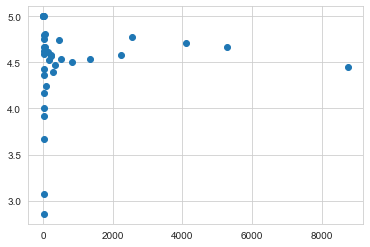

In [26]:
plt.scatter("asins", "reviews.rating", data=table)
table.corr()

From out analysis of data exploration between ASINS and reviews.rating, we discovered that there are many ASINS with low occurrence having high variances, showing that these low occurence ASINS are not significant in our analyusis because of low sample size.

Similar is the case from the values of correlation table, we can see their is no correlation between ASINS and reviews.rating.

# Sentiment Analysis
Using features in place, we build a classifier that can determine a review's sentiment.

## Set Target Variable (SENTIMENT)

Segregate ratings in terms of sentiments:
-  5 or 4    =>   Positive
-    3    =>    Neutral
-  1 or 2   =>    Negative

In [27]:
def sentiments(rating):
    if (rating==5) or (rating==4):
        return "Positive"
    elif (rating==3):
        return "Neutral"
    elif (rating==2) or (rating==1):
        return "Negative"

strat_train["Sentiment"]=strat_train["reviews.rating"].apply(sentiments)
strat_test["Sentiment"]=strat_test["reviews.rating"].apply(sentiments)
strat_train["Sentiment"][:20]

22118    Positive
18251    Positive
4471     Positive
31844    Positive
33316    Positive
8981      Neutral
27645    Positive
13806     Neutral
12022    Positive
8433     Positive
30391    Positive
27255    Positive
15348    Positive
13869    Positive
33791    Positive
23251    Positive
17309    Positive
25757    Positive
12720    Positive
31816    Positive
Name: Sentiment, dtype: object

In [28]:
X_train=strat_train["reviews.text"]
Y_train=strat_train["Sentiment"]
X_test=strat_test["reviews.text"]
Y_test=strat_test["Sentiment"]

## Extract Features

Here, we turn text content into numerical feature vectors using **Bag of Words** strategy:

- Assign fixed integer id to each word occurrence (integer indices to word occurrence dictionary)
- X[i,j] where i is the integer indices, j is the word occurrence, and X is an array of words (our training set)

In order to implement **Bag of Words** strategy, we can use skLearn's **CountVectorizer** class to perform the following:
- Text preprocessing
 - Tokenisation (separating words from sentences)
 - Stopwords (filtering "and", "in", etc.)
- Occurrence counting (creates a dictionary that holds the interger indices for the words and there word occurrences)
- Feature Vector (converts the dictionary into a feature vector)

In [29]:
X_train=X_train.fillna(" ")
X_test=X_test.fillna(" ")
Y_train=Y_train.fillna(" ")
Y_test=Y_test.fillna(" ")

In [30]:
from sklearn.feature_extraction.text import CountVectorizer
count_vec=CountVectorizer()
X_train_counts=count_vec.fit_transform(X_train)
X_train_counts.shape

(27701, 12442)

For longer documents, we typically see higher average count values for words with little meaning. This can overshadow the true analysis for shorter documents that have lower average counts with same frequencies.
<br>As a result, we use **TfidfTransformer** to reduce this redundancy:
- Term frequencies (**Tf**) divides the number of occurrences of each word by total numner of words
- Term frequencise times Inverse Document Frequency (**Tfidf**) downscales the weight of each word

In [31]:
from sklearn.feature_extraction.text import TfidfTransformer
tfidftransformer=TfidfTransformer(use_idf=False)
X_train_tfidf=tfidftransformer.fit_transform(X_train_counts)
X_train_tfidf.shape

(27701, 12442)

## Building a Pipeline from the Extacted Features

Now we would implement different test models:

**Multinomial Naive Bayes Classifier**

*Training the model*

In [32]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import Pipeline
multiNB_pipe=Pipeline([("vect", CountVectorizer()), ("tfidf", TfidfTransformer()), ("nominalNB", MultinomialNB())])
multiNB_pipe.fit(X_train, Y_train)

Pipeline(steps=[('vect', CountVectorizer()), ('tfidf', TfidfTransformer()),
                ('nominalNB', MultinomialNB())])

*Testing the model*

In [33]:
predictedMultiNB = multiNB_pipe.predict(X_test)
np.mean(predictedMultiNB == Y_test)

0.9337279815189142

Multinomial Naive Bayes Classifier has **93.37%** accuracy based on the features.

**Logistic Regression Classifier**

In [34]:
from sklearn.linear_model import LogisticRegression
LogReg_pipe=Pipeline([("vect", CountVectorizer()), ("tfidf", TfidfTransformer()), ("LogReg", LogisticRegression())])
LogReg_pipe.fit(X_train, Y_train)
predictedLogReg = LogReg_pipe.predict(X_test)
np.mean(predictedLogReg == Y_test)

0.9367600346520358

**Decision Tree Classifier**

In [35]:
from sklearn.tree import DecisionTreeClassifier
decisionTree_pipe=Pipeline([("vect", CountVectorizer()), ("tfidf", TfidfTransformer()), ("DecisionTree", DecisionTreeClassifier())])
decisionTree_pipe.fit(X_train, Y_train)
predictedDecisionTree = decisionTree_pipe.predict(X_test)
np.mean(predictedDecisionTree == Y_test)

0.8999422466069882

**Random Forest Classifier**

In [36]:
from sklearn.ensemble import RandomForestClassifier
randomForest_pipe=Pipeline([("vect", CountVectorizer()), ("tfidf", TfidfTransformer()), ("randomForestTree", RandomForestClassifier())])
randomForest_pipe.fit(X_train, Y_train)
predictedRandomForest = randomForest_pipe.predict(X_test)
np.mean(predictedRandomForest == Y_test)

0.9337279815189142

**Support Vector Machine Classifier**

In [37]:
from sklearn.svm import LinearSVC
linearSVC_pipe = Pipeline([("vect", CountVectorizer()), ("tfidf", TfidfTransformer()), ("linearSVC", LinearSVC())])
linearSVC_pipe.fit(X_train, Y_train)

predictedLinearSVC = linearSVC_pipe.predict(X_test)
np.mean(predictedLinearSVC == Y_test)

0.9357493502743286

All the models performed well (~>90%), and we will use **Support Vector Machine Classifier** and **Logistic Regression** models for the two have got the highest accuracy levels.<br>
Now we will fine tune the two models to avoid over-fitting and also to select the best of these two.

## Fine-tuning the two models (Support Vector Machine Classifier and Logistic Regression Classifier)
- We will run a **GridSearch** fo the best parameters on a grid of potential values, instead of separately tweaking the parameters of various components of the model.
- We will also run the Grid Search with both models' pipeline, parameters and cpu core maximisation
- Fit the Grid Search on training dataset
- Now we will test our final classifiers (after fine tuning) to test some arbitrary reviews.
- At last, we will test the accuracy against the testing dataset


**Support Vector Machine Classifier**

In [38]:
linearSVC_pipe.get_params().keys()

dict_keys(['memory', 'steps', 'verbose', 'vect', 'tfidf', 'linearSVC', 'vect__analyzer', 'vect__binary', 'vect__decode_error', 'vect__dtype', 'vect__encoding', 'vect__input', 'vect__lowercase', 'vect__max_df', 'vect__max_features', 'vect__min_df', 'vect__ngram_range', 'vect__preprocessor', 'vect__stop_words', 'vect__strip_accents', 'vect__token_pattern', 'vect__tokenizer', 'vect__vocabulary', 'tfidf__norm', 'tfidf__smooth_idf', 'tfidf__sublinear_tf', 'tfidf__use_idf', 'linearSVC__C', 'linearSVC__class_weight', 'linearSVC__dual', 'linearSVC__fit_intercept', 'linearSVC__intercept_scaling', 'linearSVC__loss', 'linearSVC__max_iter', 'linearSVC__multi_class', 'linearSVC__penalty', 'linearSVC__random_state', 'linearSVC__tol', 'linearSVC__verbose'])

In [39]:
from sklearn.model_selection import GridSearchCV
parameters = {'vect__ngram_range': [(1, 1), (1, 2)],    
             'tfidf__use_idf': (True, False), 
             } 
gs_clf_LinearSVC_pipe = GridSearchCV(linearSVC_pipe, parameters, n_jobs=-1)
gs_clf_LinearSVC_pipe = gs_clf_LinearSVC_pipe.fit(X_train, Y_train)
new_text = ["The tablet is good, really liked it.", # positive
            "The tablet is ok, but it works fine.", # neutral
            "The tablet is not good, does not work very well."] # negative

gs_clf_LinearSVC_pipe.predict(new_text)

array(['Positive', 'Positive', 'Negative'], dtype=object)

In [40]:
predictedGS_clf_LinearSVC_pipe = gs_clf_LinearSVC_pipe.predict(X_test)
np.mean(predictedGS_clf_LinearSVC_pipe == Y_test)

0.9386370199249205

**Logistic Regression Classifier**

In [41]:
LogReg_pipe.get_params().keys()

dict_keys(['memory', 'steps', 'verbose', 'vect', 'tfidf', 'LogReg', 'vect__analyzer', 'vect__binary', 'vect__decode_error', 'vect__dtype', 'vect__encoding', 'vect__input', 'vect__lowercase', 'vect__max_df', 'vect__max_features', 'vect__min_df', 'vect__ngram_range', 'vect__preprocessor', 'vect__stop_words', 'vect__strip_accents', 'vect__token_pattern', 'vect__tokenizer', 'vect__vocabulary', 'tfidf__norm', 'tfidf__smooth_idf', 'tfidf__sublinear_tf', 'tfidf__use_idf', 'LogReg__C', 'LogReg__class_weight', 'LogReg__dual', 'LogReg__fit_intercept', 'LogReg__intercept_scaling', 'LogReg__l1_ratio', 'LogReg__max_iter', 'LogReg__multi_class', 'LogReg__n_jobs', 'LogReg__penalty', 'LogReg__random_state', 'LogReg__solver', 'LogReg__tol', 'LogReg__verbose', 'LogReg__warm_start'])

In [42]:
gs_LogReg_pipe = GridSearchCV(LogReg_pipe, parameters, n_jobs=-1)
gs_LogReg_pipe = gs_LogReg_pipe.fit(X_train, Y_train)
new_text = ["The tablet is good, really liked it.", # positive
            "The tablet is ok, but it works fine.", # neutral
            "The tablet is not good, does not work very well."] # negative

gs_LogReg_pipe.predict(new_text)

array(['Positive', 'Neutral', 'Positive'], dtype=object)

In [43]:
predictedGS_LogReg_pipe = gs_LogReg_pipe.predict(X_test)
np.mean(predictedGS_LogReg_pipe == Y_test)

0.9367600346520358

**Results:**
- After testing arbitrary reviews, we can see both models had some mistake but the Support Vector Machine Classifier predicted the negative review correctly in comparision to Logistic Regression model which showed it as Positive sentiment (seems bad)
- Also the accuracy score for the *Support Vector Machine Classifier* stands at *93.86%* in comparision to *Logistic Regression Classifier's 93.67%*.

Thus, we select **Support Vector Machine Classifier** as our final model.

## Detailed Performance Analysis of Support Vector Machine Classifier

For detailed analysis, we will analyse the following of the grid search model used earlier:
- the best mean score
- the best estimators
- the best parameters

In [44]:
for performance_analysis in (gs_clf_LinearSVC_pipe.best_score_, gs_clf_LinearSVC_pipe.best_estimator_, gs_clf_LinearSVC_pipe.best_params_):
    print(performance_analysis)

0.9374391034474222
Pipeline(steps=[('vect', CountVectorizer(ngram_range=(1, 2))),
                ('tfidf', TfidfTransformer()), ('linearSVC', LinearSVC())])
{'tfidf__use_idf': True, 'vect__ngram_range': (1, 2)}


- We can see the best mean score is *93.74%*- close to our final accuracy score of *93.86%*
- Best estimator is displayed here
- Our best parameters are "True" for use_idf in tfidf, and ngram_range: (1,2)

In [45]:
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score

print(classification_report(Y_test, predictedGS_clf_LinearSVC_pipe))
print('Accuracy: {}'. format(accuracy_score(Y_test, predictedGS_clf_LinearSVC_pipe)))

              precision    recall  f1-score   support

                   0.00      0.00      0.00         3
    Negative       0.66      0.22      0.33       157
     Neutral       0.44      0.08      0.14       299
    Positive       0.94      1.00      0.97      6467

    accuracy                           0.94      6926
   macro avg       0.51      0.32      0.36      6926
weighted avg       0.92      0.94      0.92      6926

Accuracy: 0.9386370199249205


Below is the summary of the classification report:

- Precision: determines how many objects selected were correct
- Recall: determines how many objects that should have been correct were selected
- F1 score: measures the weighted value of precision and recall (1 means both are equally important, 0 otherwise)
- Support: number of occurrence of each class

The results in the classification report confirms our data exploration analysis, where the data was skewed to the positive reviews as shown by the lower support count for other two sentiments. Also, the neutral and negative reviews have large standard deviation with small frequencies, which we would not consider as shown by lower precision, recall and F1 scores.

Despite the neutral and negative results are not strong predictors, still we have got a good accuracy score of 93.86% in predicting the sentiment analysis, which we tested and worked very well. Therefore, we are comfortable here with the skewed dataset. Also, as we continue to train our model for new input- a more balanced dataset- the model would readjust to a more balanced classifier with increased accuracy score.

Finally, the result shows that most of the products are positively rated.

In [46]:
from sklearn import metrics
metrics.confusion_matrix(Y_test, predictedGS_clf_LinearSVC_pipe)

array([[   0,    0,    0,    3],
       [   0,   35,   15,  107],
       [   0,    8,   24,  267],
       [   0,   10,   15, 6442]], dtype=int64)

Considering row and columns in range 2 to 4 labeled as Negative, Neutral and Positive respectively, we see that positive sentiment has been confused with neutral and negative sentiments, with score of 267 and 107 respectively. However, based on an overall true positive score of 6442, these two confusion scores seem insignificant.

Also we can relate from our data exploration and analysis that the data was highly skewed to positive rating, which is consistently shown here too. Therefore, we conclude most of the products are positively rated, and should be kept in the inventory.

# Final Answer to our Problem

From the analysis of the classification report, we can see the products with lower ratings are not significant enough to predict that those are inferior. And for the products with positive ratings are considered superior products, perform well and purchased in high quantity.

In order to qualify the model for low rated products, we need more data to train the model and improve the significance for negative and neutral rated products.

Good point here we achieved was how well the model managed skewed data and were able to build a robust Sentiment Analyser.

To conclude I can say, although it would require more data to improve the significance and training of the model for negative reviews, we were still able to successfully asscociate postive, neutral and negative sentiments for the products from Amazon's catalog.